In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from numpy import *
import camb
from camb import model, initialpower

In [2]:
# Configuración de parámetros
# Parámetros actuales del universo
cosmo_params = {
    'H0': 67.5,        # Constante de Hubble [km/s/Mpc]
    'ombh2': 0.022,    # densidad de bariones
    'omch2': 0.122,    # densidad de CDM
    'mnu': 0.06,       # suma de masas de neutrinos [eV]
    'omk': 0,          # curvatura (universo plano)
    'tau': 0.06,       # reionización
    'As': 2e-9,        # comoving Curvature Power / fiducial amplitude guess
    'ns': 0.965        # índice espectral escalar
}

pars = camb.set_params(**cosmo_params)
pars.InitPower.set_params()

print('----- Cosmological Parameters -----')
for key, val in cosmo_params.items():
    print(f'{key} = {val}')

# redshifts
zs = [0., 0.5, 1., 2., 3.]

----- Cosmological Parameters -----
H0 = 67.5
ombh2 = 0.022
omch2 = 0.122
mnu = 0.06
omk = 0
tau = 0.06
As = 2e-09
ns = 0.965


Note: redshifts have been re-sorted (earliest first)


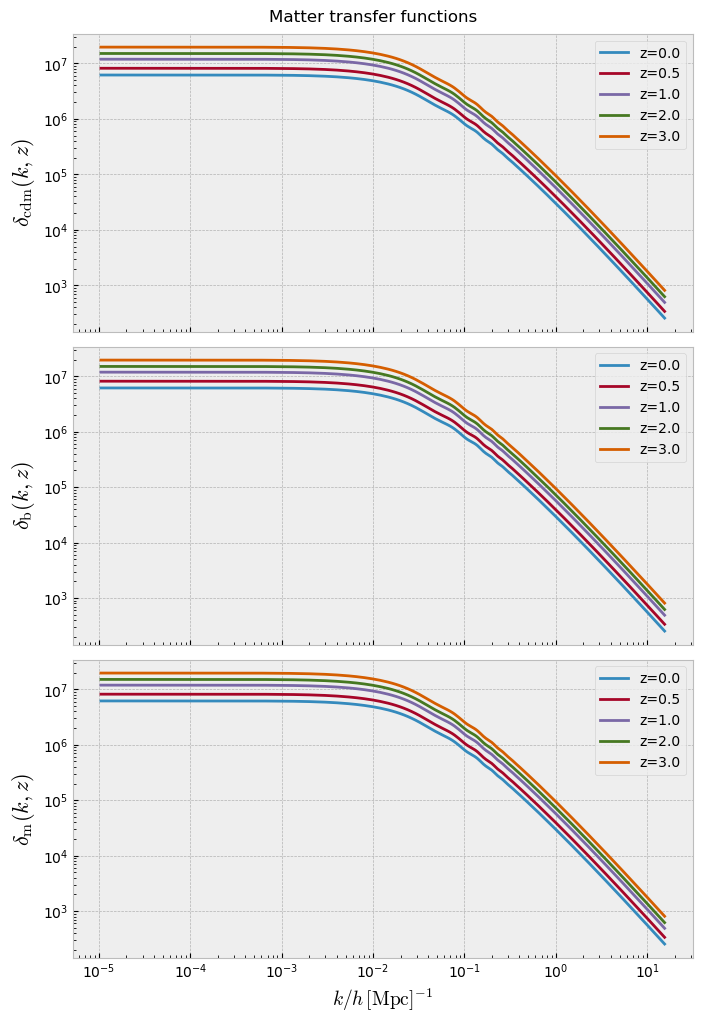

In [3]:
# Transfer Functions
pars.set_matter_power(redshifts=zs, kmax=10)
results = camb.get_results(pars)
trans = results.get_matter_transfer_data()

fig = plt.figure(figsize=(8, 12))
gs = fig.add_gridspec(3, hspace=0.05)
axs = gs.subplots(sharex=True)

for i, redshift in enumerate(zs):
    kh = trans.transfer_data[0, :, i]
    delta_cdm = trans.transfer_data[1, :, i]
    delta_b = trans.transfer_data[2, :, i]
    delta_tot = trans.transfer_data[model.Transfer_tot - 1, :, i]
    
    axs[0].loglog(kh, delta_cdm, label=f'z={redshift}')
    axs[1].loglog(kh, delta_b, label=f'z={redshift}')
    axs[2].loglog(kh, delta_tot, label=f'z={redshift}')


fig.suptitle('Matter transfer functions', y=0.9) 
axs[0].set_ylabel(r'$\delta_{\rm cdm}(k,z)$', fontsize=16)
axs[1].set_ylabel(r'$\delta_{\rm b}(k,z)$', fontsize=16)
axs[2].set_ylabel(r'$\delta_{\rm m}(k,z)$', fontsize=16)
axs[2].set_xlabel(r'$k/h\, [\rm Mpc]^{-1}$', fontsize=14)

axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.grid(True)
plt.show()

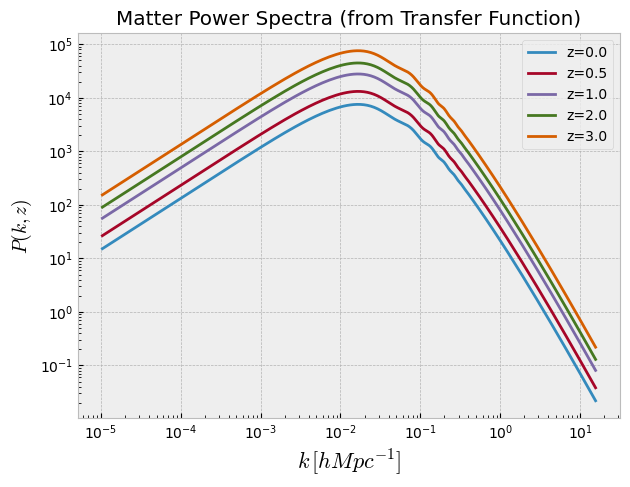

In [4]:
# Matter Power Spectra
plt.figure(figsize=(7,5))
for i, redshift in enumerate(zs):
    kh = trans.transfer_data[0, :, i]
    k  = kh * results.Params.h
    Transfer = trans.transfer_data[model.Transfer_tot - 1, :, i]
    primordial_PK = results.Params.scalar_power(k)
    matter_power = primordial_PK * Transfer**2 * k**4 / (k**3 / (2*pi**2))
    plt.loglog(kh, matter_power, label=f'z={redshift}')

plt.title('Matter Power Spectra (from Transfer Function)')  
plt.xlabel(r'$k\, [h Mpc^{-1}]$', fontsize=16)
plt.ylabel(r'$P(k,z)$', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()